In [53]:
import torch
from torch import nn
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 2.5]
def dx(f, wrt, n):
    f = torch.sum(f)
    for i in range(n):
        grads = torch.autograd.grad(f, wrt, create_graph=True, allow_unused=True)[0]
        f = grads.sum()
    return grads
x = np.linspace(1, 3, 3).reshape(-1, 1)
y = np.linspace(1, 3, 3).reshape(-1, 1)
X = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
x = X[:, 0]
y = X[:, 1]
x = torch.from_numpy(x).requires_grad_()
y = torch.from_numpy(y).requires_grad_()
X = torch.from_numpy(X).float()
X.requires_grad_()
# f = X[:, 0]**2 + 2*X[:, 1]*X[:, 0]
f = x**2 + 2*y*x
# print(X)
# print(x)
# print(y)
# print(f)
# print(torch.autograd.grad(torch.sum(f), y, create_graph=True))
print(dx(f, x, 2))
# dx1 = torch.autograd.grad(torch.sum(f), X, create_graph=True)[0][:, 1]
# print(dx(dx1, X, 1))


# inputs = (torch.asarray([1.0, 2.0]), torch.asarray([1.0, 2.0]))
# print(inputs)
# torch.autograd.functional.jacobian(func, inputs)


tensor([2., 2., 2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64,
       grad_fn=<MulBackward0>)


(161, 535)


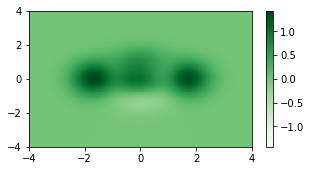

In [59]:
dx, dy = 0.015, 0.05
y, x = np.mgrid[slice(-4, 4 + dy, dy),slice(-4, 4 + dx, dx)]
z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
print(y.shape)
c = plt.pcolormesh(x, y, z, cmap ='Greens', vmin = z_min, vmax = z_max)
plt.colorbar(c)

plt.show()